Imports

In [ ]:
import numpy as np
import pandas as pd 

Getting the Data 

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data

--2019-02-17 12:20:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25964 (25K) [text/plain]
Saving to: ‘dermatology.data’

dermatology.data    100%[=====================>]  25.36K  --.-KB/s   in 0.07s  

2019-02-17 12:20:44 (371 KB/s) - ‘dermatology.data’ saved [25964/25964]



In [3]:
Df = pd.read_csv("dermatology.data" , sep = "," , header = None)

Df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


Reading about data at https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.names

     This database contains 34 attributes, 33 of which are linear
     valued and one of them is nominal. 

     The differential diagnosis of erythemato-squamous diseases is a real
     problem in dermatology. They all share the clinical features of
     erythema and scaling, with very little differences. The diseases in
     this group are psoriasis, seboreic dermatitis, lichen planus, 
     pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris.
     Usually a biopsy is necessary for the diagnosis but unfortunately
     these diseases share many histopathological features as
     well. Another difficulty for the differential diagnosis is that a
     disease may show the features of another disease at the beginning
     stage and may have the characteristic features at the following stages. 
     Patients were first evaluated clinically with 12 features.
     Afterwards, skin samples were taken for the evaluation of 22
     histopathological features. The values of the histopathological features
     are determined by an analysis of the samples under a microscope. 

     In the dataset constructed for this domain, the family history feature
     has the value 1 if any of these diseases has been observed in the
     family, and 0 otherwise. The age feature simply represents the age of
     the patient. Every other feature (clinical and histopathological) was
     given a degree in the range of 0 to 3. Here, 0 indicates that the
     feature was not present, 3 indicates the largest amount possible,
     and 1, 2 indicate the relative intermediate values.

     The names and id numbers of the patients were recently 
     removed from the database.

In [5]:
column_names = ['erythema', 'scaling ', 'definite borders', 'itching ', 'koebner phenomenon', 'polygonal papules', 'ollicular papules',
                'oral mucosal involvement', 'knee and elbow involvement', 'scalp involvement', 'family history', 'melanin incontinence',
                'eosinophils in the infiltrate', 'PNL infiltrate', 'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis', 
                'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges', 'elongation of the rete ridges',
                'thinning of the suprapapillary epidermis', 'spongiform pustule', 'munro microabcess', 'focal hypergranulosis', 
                'disappearance of the granular layer', 'vacuolisation and damage of basal layer', 'spongiosis', 
                'saw-tooth appearance of retes', 'follicular horn plug', 'perifollicular parakeratosis',
                'inflammatory monoluclear inflitrate', 'band-like infiltrate', 'Age', 'Disease']

Df = pd.read_csv('dermatology.data',  sep = "," , names=column_names)
Df.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,ollicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


Lets look into the dataset , dataset providers mentioned : Missing Attribute Values: 8 (in Age attribute). Distinguished with '?'.

In [7]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
erythema                                    366 non-null int64
scaling                                     366 non-null int64
definite borders                            366 non-null int64
itching                                     366 non-null int64
koebner phenomenon                          366 non-null int64
polygonal papules                           366 non-null int64
ollicular papules                           366 non-null int64
oral mucosal involvement                    366 non-null int64
knee and elbow involvement                  366 non-null int64
scalp involvement                           366 non-null int64
family history                              366 non-null int64
melanin incontinence                        366 non-null int64
eosinophils in the infiltrate               366 non-null int64
PNL infiltrate                              366 non-null int64
fibrosis of t

In [9]:
Df.isnull().values.any()  # There are no Null Values 

False

In [10]:
print((Df['Age'] == '?').sum())

8

In [11]:
# So there are 8 Values in Age with value => "?"
# Lets replace them with the mean of whole column

In [16]:
Df['Age'].replace('?', '0', inplace=True)
Df['Age'] = Df['Age'].astype(np.int32)
Df['Age'].replace('?', Df['Age'].mean(), inplace=True)

In [17]:
Df.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,ollicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [19]:
print((Df['Age'] == '?').sum())

0


In [20]:
Df.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,ollicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Disease
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,35.502732,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,16.060459,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,24.250000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


Creating the Model

In [31]:
Data = Df.iloc[:,:].values

X = Data[:,:34].astype(np.float64)
Y = Data[:,34]

In [32]:
print(X.shape)

print(Y.shape)

(366, 34)
(366,)


Splitting the Data into Training and Testing 

In [33]:
from sklearn.model_selection import train_test_split 

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.25 , random_state = 2)

In [34]:
print(" <===========  Training Data Shapes ===============> ")

print( Xtrain.shape , Ytrain.shape)

print(" <===========  Testing Data Shapes ===============> ")

print( Xtest.shape , Ytest.shape)

 <===========  Training Data Shapes ===============> 
(274, 34) (274,)
 <===========  Testing Data Shapes ===============> 
(92, 34) (92,)


Normalizing the Data

In [35]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
X_train = Scaler.fit_transform(Xtrain)
X_test = Scaler.transform(Xtest)

Importing the model

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 200)

model.fit(Xtrain , Ytrain)

print(" Accuracy : " , model.score(Xtest , Ytest))

 Accuracy :  0.9782608695652174


/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [41]:
from sklearn.metrics import confusion_matrix

Ypred = model.predict(Xtest)

cm = confusion_matrix(Ytest, Ypred)

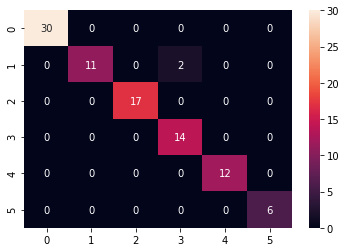

In [44]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.heatmap(cm , annot=True)